## AMIRA Method Testing

In [1]:
#Import libraries
import csv
import requests
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Setting option to display all columns
pd.set_option("display.max_columns", None)

#AMIRA libraries
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#Import dataset
data = pd.read_csv("/Users/sebastiansimmel/Desktop/Uni/T3/AdPro/Project/github/group_12/Files/downloads/downloaded_data.csv")

In [73]:
def arimaprediction(country: str, prediction_periods: int = 5):
    
    #Raise error for invalid prediction period
    if type(prediction_periods) != int or prediction_periods < 1:
        raise ValueError("Prediction period must be an integer and at minimum 1.")
    
    #Raise error for invalid country
    if country not in list(np.unique(data["country"])):
        raise KeyError("Chosen country %s does not exist." % country)

    # Get country-specific data
    df_country = data[(data["country"] == country)][["country", "primary_energy_consumption", "total_emissions"]]
    df_country.dropna(axis = 0, inplace = True)

    #Use Auto-ARIMA
    prediction = pd.DataFrame()
    prediction['Time'] = pd.date_range(start='2020-01-01', periods = prediction_periods, freq='YS')

    for column in ["primary_energy_consumption", "total_emissions"]:
        arima_model = auto_arima(df_country[column],
                             start_p = 0,
                             start_q = 0, 
                             max_p = 5,
                             max_q = 5,
                             seasonal = False,
                             d = None,
                             error_action ='ignore',
                             suppress_warnings = True,
                             stepwise = False)
        
        prediction[column] = pd.DataFrame(arima_model.predict(n_periods = prediction_periods))
    
    prediction.set_index("Time", inplace=True)
    prediction.columns = ["Predicted consumption", "Predicted emissions"]
    
    #Plot outcome
    fig, ax1 = plt.subplots(figsize=(15,10))

    ax1.set_xlabel("Year")
    ax1.set_ylabel("Consumption")
    ax1.plot(df_country["primary_energy_consumption"], color = "blue", label = "Energy Consumption")
    ax1.plot(prediction["Predicted consumption"], color = "blue", linestyle="dashed", label = "Predicted Energy Consumption")

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_ylabel("Emissions")
    ax2.plot(df_country["total_emissions"], color = "green", label = "Emissions")
    ax2.plot(prediction["Predicted emissions"], color = "green", linestyle="dashed", label = "Predicted Emissions")

    fig.legend(loc = 2, borderaxespad = 7)
    plt.title("ARIMA Prediction for Energy Consumption and Emissions of " + country, fontsize=20)
    plt.show()

In [74]:
arimaprediction("United States", 10)

KeyError: "['total_emissions'] not in index"

In [68]:
def scatter(year: int = 2019):
    
    #Raise error for invalid prediction period
    if type(year) != int:
        raise ValueError("Year must be an integer.")
    
    #Get year-specific data
    df_year = data[(data["year"] == year)][["country", "population", "primary_energy_consumption", "electricity_generation"]]
    df_year.dropna(axis = 0, inplace = True)
    
    #Drop cummulated rows
    cummulated = ["Africa","Asia Pacific","CIS","Central America","Eastern Africa","Europe", "Europe (other)", "Middle Africa", "Middle East", "North America", "OPEC", "Other Asia & Pacific","Other CIS","Other Caribbean","Other Northern Africa","Other South America", "Other Southern Africa", "South & Central America","Western Africa","World"]
    df_year = df_year[df_year.country.isin(cummulated) == False]
    
    #Plot
    plt.figure(figsize=(15, 10))
    sns.scatterplot(data = df_year, x = "primary_energy_consumption", y = "electricity_generation", size = "population", sizes=(20, 500), alpha = 0.7)
    plt.xlabel("Total Energy Consumption", fontsize=14)
    plt.ylabel("Total Emissions", fontsize=14)
    plt.title("Total Emissions and Energy Consumption of Year " + str(year), fontsize=20)
    
    plt.xscale("log")
    plt.yscale("log")
    plt.show()

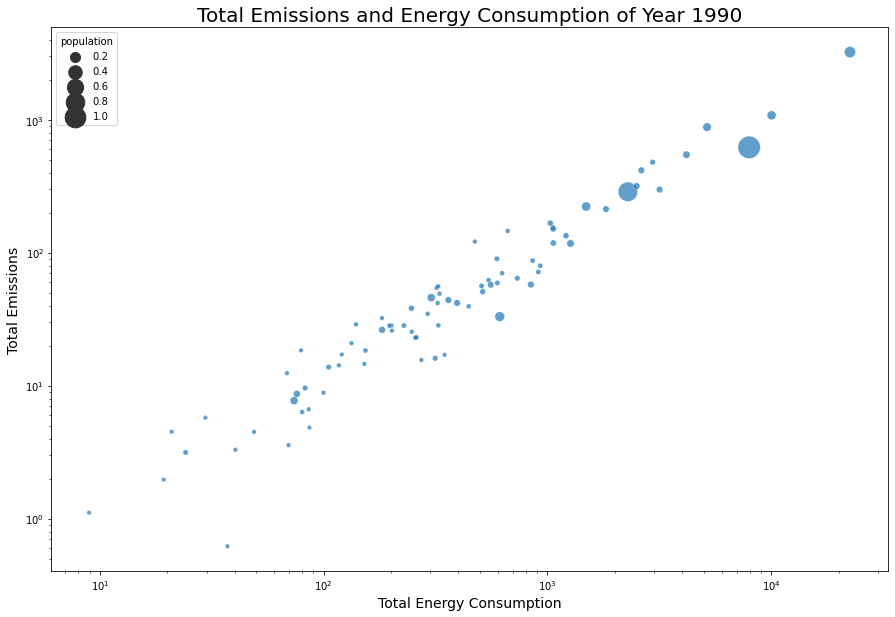

In [69]:
scatter(1990)

In [31]:
data

iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  \
0          AFG  Afghanistan  1900                   NaN                   NaN   
1          AFG  Afghanistan  1901                   NaN                 0.000   
2          AFG  Afghanistan  1902                   NaN                 0.000   
3          AFG  Afghanistan  1903                   NaN                 0.000   
4          AFG  Afghanistan  1904                   NaN                 0.000   
...        ...          ...   ...                   ...                   ...   
17465      ZWE     Zimbabwe  2015               -25.013               -10.847   
17466      ZWE     Zimbabwe  2016               -37.694               -12.257   
17467      ZWE     Zimbabwe  2017                 8.375                 1.697   
17468      ZWE     Zimbabwe  2018                22.555                 4.952   
17469      ZWE     Zimbabwe  2019               -35.015                -9.422   

       gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                      NaN                  NaN                  NaN   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
17465                  NaN                  NaN                  NaN   
17466                  NaN                  NaN                  NaN   
17467                  NaN                  NaN                  NaN   
17468                  NaN                  NaN                  NaN   
17469                  NaN                  NaN                  NaN   

       oil_prod_change_twh  energy_cons_change_pct  energy_cons_change_twh  \
0                      NaN                     NaN                     NaN   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   
...                    ...                     ...                     ...   
17465                  NaN                  -0.789                  -0.443   
17466                  NaN                 -14.633                  -8.142   
17467                  NaN                     NaN                     NaN   
17468                  NaN                     NaN                     NaN   
17469                  NaN                     NaN                     NaN   

       biofuel_share_elec  biofuel_elec_per_capita  biofuel_cons_change_pct  \
0                     NaN                      NaN                      NaN   
1                     NaN                      NaN                      NaN   
2                     NaN                      NaN                      NaN   
3                     NaN                      NaN                      NaN   
4                     NaN                      NaN                      NaN   
...                   ...                      ...                      ...   
17465               1.363                    9.266                      NaN   
17466               2.154                   10.477                      NaN   
17467               2.066                   10.606                      NaN   
17468               2.048                   12.951                      NaN   
17469               2.285                   14.111                      NaN   

       biofuel_share_energy  biofuel_cons_change_twh  biofuel_consumption  \
0                       NaN                      NaN                  NaN   
1                       NaN                      NaN                  NaN   
2                       NaN                      Na

In [43]:
import seaborn as sns
